In [131]:
#Install required packages
!pip install mapclassify

In [132]:
#Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
import numpy as np
import mapclassify

#Data Exploration and Pre-Processing
###Explore and pre-process the spatial dataframe
The London Boroughs Shapefile (Greater London Authority, 2011) provides a spatial representation of London's boroughs for geographic analysis, updated on an ad hoc basis. The dataset uses the British National Grid (EPSG:27700) coordinate system, with a Transverse Mercator projection and OSGB 1936 datum. The dataset is provided in the shapefile format, which includes .shp, .shx, .dbf, and .prj files.

In [133]:
# Load London Boroughs shapefile
london = gpd.read_file('London_Borough_Excluding_MHW.shp')

In [134]:
#Explore the data
london.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4     None  POLYGON ((510253.500 182881.600, 510249.900 18...

In [135]:
#Drop the fields that are not necessary for the analysis
london.drop(['GSS_CODE','NONLD_AREA',	'ONS_INNER','SUB_2009',	'SUB_2006'],axis=1, inplace=True)

In [136]:
#Explore the spatial dataframe
london.explore()

In [137]:
london.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME      33 non-null     object  
 1   HECTARES  33 non-null     float64 
 2   geometry  33 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 920.0+ bytes


### Explore and pre-process the dependent variable for the analysis

###Green Spaces
The Green and Blue Cover Data for London Boroughs (Greater London Authority, 2023) provides detailed information on the extent of green spaces (such as parks and gardens) and blue spaces (such as rivers and lakes) within each borough of London.

In [138]:
# Load the green spaces data
green_spaces = pd.read_csv('green_cover_borough.csv')

In [139]:
# Display the first 5 columns of the data
green_spaces.head()

lb_code    lb_name  borough_area_hectare  green_area_hectare  \
0        City of London  E09000001                314.94               17.61   
1  Barking and Dagenham  E09000002               3779.93             1481.78   
2                Barnet  E09000003               8674.84             5030.91   
3                Bexley  E09000004               6428.65             2759.07   
4                 Brent  E09000005               4323.27             1726.56   

   blue _area_hectare  green+blue_area_hectare  percent_green  percent_blue  \
0               24.31                    41.92           5.59          7.72   
1              230.50                  1712.28          39.20          6.10   
2               60.01                  5090.92          57.99          0.69   
3              437.52                  3196.59          42.92          6.81   
4               44.59                  1771.15          39.94          1.03   

   percent_green+blue  
0               13.31  
1               45.30  
2               58.69  
3               49.72  
4               40.97

In [140]:
# Rename percent_green field
green_spaces['Percentage of Green Spaces'] = green_spaces['percent_green']

In [141]:
# Drop fields that are not useful to the analysis
green_spaces.drop(['lb_name',
                   'borough_area_hectare',
                   'blue _area_hectare',
                   'green+blue_area_hectare',
                   'percent_blue',
                   'percent_green+blue', 'green_area_hectare', 'percent_green'], axis=1, inplace=True)

In [142]:
# Check that it has worked
green_spaces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lb_code                     33 non-null     object 
 1   Percentage of Green Spaces  33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [143]:
# Join the economic activity data to the london geodataframe using a lefthand join
joined_green =london.merge(green_spaces, how='left',left_on='NAME', right_on='lb_code')

In [144]:
# Explore the outcome of interest
joined_green.explore('Percentage of Green Spaces', cmap= 'Greens' )

In [145]:
joined_green.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   NAME                        33 non-null     object  
 1   HECTARES                    33 non-null     float64 
 2   geometry                    33 non-null     geometry
 3   lb_code                     32 non-null     object  
 4   Percentage of Green Spaces  32 non-null     float64 
dtypes: float64(2), geometry(1), object(2)
memory usage: 1.4+ KB


### Explore and pre-process the independent variable for the analysis

### 1) Economic Activity

The Economic Activity Dataset for London (Office for National Statistics, 2024), offers comprehensive data on the economic activity status of residents within various Lower layer Super Output Areas (LSOA) of London. Each field represents the population count with the corresponding economic activity for each LSOA within London.

In [146]:
# Load the economic activity data
economic_activity_df = pd.read_csv('Economic_Activity.csv')

# Display the first 5 columns of the data
economic_activity_df.head()

local authority code local authority name  LSOA code  \
0            E09000001       City of London  E01000001   
1            E09000001       City of London  E01000002   
2            E09000001       City of London  E01000003   
3            E09000001       City of London  E01000005   
4            E09000001       City of London  E01032739   

   All usual residents aged 16 or over  \
0                                 1356   
1                                 1301   
2                                 1504   
3                                  964   
4                                 1546   

   Economically active: Employee: Full-time  \
0                                       573   
1                                       593   
2                                       677   
3                                       328   
4                                       922   

   Economically active: Employee: Part-time  \
0                                        78   
1                                        61   
2                                       115   
3                                        95   
4                                        51   

   Economically active: Full-time student  \
0                                      16   
1                                      11   
2                                      10   
3                                      38   
4                                      24   

   Economically active: Self-employed with employees: Full-time  \
0                                                 42              
1                                                 36              
2                                                 18              
3                                                  3              
4                                                 26              

   Economically active: Self-employed with employees: Part-time  \
0                                                  2              
1                                                  4              
2                                                  7              
3                                                  5              
4                                                  7              

   Economically active: Self-employed without employees: Full-time  \
0                                                 80                 
1                                                111                 
2                                                 90                 
3                                                 25                 
4                                                 92                 

   Economically active: Self-employed without employees: Part-time  \
0                                                 81                 
1                                                 63                 
2                                                 83                 
3                                                 19                 
4                                                 69                 

   Economically active: Unemployed  \
0                               35   
1                               32   
2                               68   
3                               59   
4                               45   

   Economically inactive: Long-term sick or disabled  \
0                                                  9   
1                                                  0   
2                                                 40   
3                                                 52   
4                                                 11   

   Economically inactive: Looking after home or family  \
0                                                 34     
1                                                 28     
2                                                 40     
3                                                 40     
4                                                 28     



The analysis will focus on comparing London boroughs instead of LSOAs

In [147]:
# Group data by london boroughs instead of LSOA for the analysis
economic_activity_df = economic_activity_df.groupby('local authority name').sum()

#Drop unnecessary columns
economic_activity_df.drop (['local authority code', 'LSOA code'], axis=1, inplace=True)

To simplify the analysis, group subcategories into 3 broader categories: Active and employed, active and unemployed and inactive.

In [148]:
#Group variables to focus on broader categories
economic_activity_df['Active_Employed'] = economic_activity_df[
    ['Economically active: Employee: Full-time',
     'Economically active: Employee: Part-time',
     'Economically active: Self-employed with employees: Full-time',
     'Economically active: Self-employed with employees: Part-time',
     'Economically active: Full-time student',
     'Economically active: Self-employed without employees: Full-time',
     'Economically active: Self-employed without employees: Part-time']].sum(axis=1)

economic_activity_df['Active_Unemployed'] = economic_activity_df ['Economically active: Unemployed']

economic_activity_df['Inactive'] = economic_activity_df[
    ['Economically inactive: Long-term sick or disabled',
     'Economically inactive: Looking after home or family',
     'Economically inactive: Other',
     'Economically inactive: Retired',
     'Economically inactive:  Full-time students']].sum(axis=1)

###Standardise the data using percentages

Converting counts into percentages makes the data comparable across the different London boroughs, regardless of differences in population size or size of boroughs. This allows for fair comparisons and analysis (Quinn et al., 2018).

In [149]:
# Standardise data using percentages for further analysis
economic_activity_df['Percentage Employed'] = (economic_activity_df['Active_Employed'] / economic_activity_df['All usual residents aged 16 or over']) * 100
economic_activity_df['Percentage Unemployed'] = (economic_activity_df['Active_Unemployed'] / economic_activity_df['All usual residents aged 16 or over']) * 100
economic_activity_df['Percentage Inactive'] = (economic_activity_df['Inactive'] / economic_activity_df['All usual residents aged 16 or over']) * 100

In [150]:
#Drop the subcategories that are not useful for analysis
economic_activity_df.drop(['Economically active: Employee: Full-time',
                        'Economically active: Employee: Part-time',
                            'Economically active: Full-time student',
                            'Economically active: Self-employed with employees: Full-time',
                            'Economically active: Self-employed with employees: Part-time',
                            'Economically active: Self-employed without employees: Full-time',
                            'Economically active: Self-employed without employees: Part-time',
                            'Economically active: Unemployed',
                            'Economically inactive: Long-term sick or disabled',
                            'Economically inactive: Looking after home or family',
                            'Economically inactive: Other', 'Economically inactive: Retired',
                            'Economically inactive:  Full-time students',
                            'All usual residents aged 16 or over',
                            'Active_Employed', 'Active_Unemployed', 'Inactive'
                             ], axis=1, inplace=True)

economic_activity = economic_activity_df

In [151]:
#View final dataset
economic_activity.head()

Percentage Employed  Percentage Unemployed  \
local authority name                                               
Barking and Dagenham            59.323511               4.731463   
Barnet                          60.801893               3.774182   
Bexley                          60.819520               3.204441   
Brent                           59.442359               4.531198   
Bromley                         61.540899               3.002207   

                      Percentage Inactive  
local authority name                       
Barking and Dagenham            35.945025  
Barnet                          35.423925  
Bexley                          35.976039  
Brent                           36.026443  
Bromley                         35.456894

Repeat the general steps for the remaining two independent variables

###2) Qualification Level

The Qualifications Dataset for London (Office for National Statistics, 2024), provides detailed information on the educational qualifications of residents across different LSOAs within London. The data includes levels 1-4+ of various qualification levels as well as persons with no qualifications and other forms of qualification. Each field represents the population count with the corresponding qualification level for each LSOA within London.

In [152]:
# Load the qualification level data
qualifications_df = pd.read_csv('Qualifications.csv')

# Display the first 5 columns of the data
qualifications_df.head()

LSOA code local authority code  local authority name  \
0  E01000001            E09000001        City of London   
1  E01000002            E09000001        City of London   
2  E01000003            E09000001        City of London   
3  E01000005            E09000001        City of London   
4  E01000006            E09000002  Barking and Dagenham   

   Usual residents aged 16+  none  Level 1  Level 2  Level 3  Level 4+  Other  
0                      1353    32       26       67       86      1126     16  
1                      1300    23       28       56       89      1086     18  
2                      1505   132       61      102      121      1055     34  
3                       958   197       61      154      130       387     29  
4                      1429   295      155      208      206       499     66

In [153]:
#Group data by london boroughs instead of LSOA for the analysis
qualifications_df = qualifications_df.groupby('local authority name').sum()

#Drop unneccessary columns
qualifications_df.drop (['local authority code', 'LSOA code'], axis=1, inplace=True)

In [154]:
#Group variables to focus on broader categories
qualifications_df['Levels 1 or below'] = qualifications_df[['Level 1',	'none']].sum(axis=1)

qualifications_df['Levels 2 or 3'] = qualifications_df [['Level 2', 'Level 3']].sum(axis=1)

In [155]:
# Standardise data using percentages for further analysis
qualifications_df['Percentage Level 1 or below'] = (qualifications_df['Levels 1 or below'] / qualifications_df['Usual residents aged 16+']) * 100
qualifications_df['Percentage Levels 2 or 3'] = (qualifications_df['Levels 2 or 3'] / qualifications_df['Usual residents aged 16+']) * 100
qualifications_df['Percentage Level 4+'] = (qualifications_df['Level 4+'] / qualifications_df['Usual residents aged 16+']) * 100

In [156]:
#Drop the subcategories that are not useful for analysis
qualifications_df.drop(['none',
                        'Level 1',
                        'Level 2',
                        'Level 3',
                        'Level 4+',
                        'Other',
                        'Usual residents aged 16+',
                        'Levels 1 or below',
                        'Levels 2 or 3'
                             ], axis=1, inplace=True)

qualifications = qualifications_df

In [157]:
#View the dataset
qualifications.head()

Percentage Level 1 or below  Percentage Levels 2 or 3  \
local authority name                                                          
Barking and Dagenham                    33.102954                 29.951410   
Barnet                                  22.334316                 25.484376   
Bexley                                  29.106696                 36.389499   
Brent                                   30.557282                 25.452649   
Bromley                                 22.496530                 32.142642   

                      Percentage Level 4+  
local authority name                       
Barking and Dagenham            33.254411  
Barnet                          49.024458  
Bexley                          31.581286  
Brent                           39.973392  
Bromley                         42.814358

### 3) Age

The Age Dataset for London (Office for National Statistics, 2024) offers  demographic information about the population distribution across various age groups within London. This dataset encompasses age bands ranging from 0 to 85 and above, grouped into intervals of five years. Each field represents the population count within the corresponding age band for each LSOA within London.

In [158]:
# Load the age data
age_df = pd.read_csv('age.csv')

# Display the first 5 columns of the data
age_df.head()

LSOA code local authority code local authority name  All usual residents  \
0  E01000001            E09000001       City of London                 1484   
1  E01000002            E09000001       City of London                 1382   
2  E01000003            E09000001       City of London                 1617   
3  E01000005            E09000001       City of London                 1098   
4  E01032739            E09000001       City of London                 1613   

   Aged 4 and under  Aged 5 to 9  Aged 10 to 14  Aged 15 to 19  Aged 20 to 24  \
0                52           35             32             23             91   
1                34           23             22             30            100   
2                40           35             33             23             95   
3                50           44             35             89            118   
4                18           17             34             24            305   

   Aged 25 to 29  ...  Aged 40 to 44  Aged 45 to 49  Aged 50 to 54  \
0            160  ...            114            105             89   
1            166  ...             92             95            122   
2            187  ...            113            111            155   
3             96  ...             62             59             87   
4            326  ...            101             81            104   

   Aged 55 to 59  Aged 60 to 64  Aged 65 to 69  Aged 70 to 74  Aged 75 to 79  \
0             74             84            120            101             58   
1             89             87             74             70             59   
2            118            111             85             87             50   
3             84             65             35             26             17   
4             68             54             31             14              8   

   Aged 80 to 84  Aged 85 and over  
0             57                36  
1             43                32  
2             31                34  
3             13                13  
4              7                 2  

[5 rows x 22 columns]

In [159]:
#Group data by london boroughs instead of LSOA for the analysis
age_df = age_df.groupby('local authority name').sum()

#Drop unneccessary columns
age_df.drop (['local authority code', 'LSOA code'], axis=1, inplace=True)

In [160]:
#Group variables to focus on broader categories
age_df['25 to 34'] = age_df[['Aged 25 to 29',	'Aged 30 to 34']].sum(axis=1)

age_df['35 to 44'] = age_df[['Aged 35 to 39',	'Aged 40 to 44']].sum(axis=1)

age_df['45 to 54'] = age_df[['Aged 45 to 49',	'Aged 50 to 54']].sum(axis=1)

age_df['55 to 64'] = age_df[['Aged 55 to 59',	'Aged 60 to 64']].sum(axis=1)

age_df['65+'] = age_df[['Aged 65 to 69',
                        'Aged 70 to 74',
                        'Aged 75 to 79',
                        'Aged 80 to 84',
                        'Aged 85 and over']].sum(axis=1)

In [161]:
# Standardise data using percentages for further analysis
age_df['Percentage Aged 20 to 24'] = (age_df['Aged 20 to 24'] / age_df['All usual residents']) * 100
age_df['Percentage Aged 25 to 34'] = (age_df['25 to 34'] / age_df['All usual residents']) * 100
age_df['Percentage Aged 35 to 44'] = (age_df['35 to 44'] / age_df['All usual residents']) * 100
age_df['Percentage Aged 45 to 54'] = (age_df['45 to 54'] / age_df['All usual residents']) * 100
age_df['Percentage Aged 55 to 64'] = (age_df['55 to 64'] / age_df['All usual residents']) * 100
age_df['Percentage Aged 65+'] = (age_df['65+'] / age_df['All usual residents']) * 100

In [162]:
#Drop the subcategories that are not useful for analysis
age_df.drop(['Aged 4 and under',
'Aged 5 to 9', 'Aged 10 to 14', 'Aged 15 to 19', 'Aged 20 to 24', 'Aged 25 to 29',
'Aged 30 to 34','Aged 35 to 39','Aged 40 to 44','Aged 45 to 49','Aged 50 to 54',
'Aged 55 to 59','Aged 60 to 64','Aged 65 to 69','Aged 70 to 74','Aged 75 to 79',
'Aged 80 to 84','Aged 85 and over','25 to 34','35 to 44','45 to 54','55 to 64','65+','All usual residents'
             ], axis=1, inplace=True)

age = age_df

In [163]:
#View the dataset
age.head()

Percentage Aged 20 to 24  Percentage Aged 25 to 34  \
local authority name                                                       
Barking and Dagenham                  6.059429                 15.212782   
Barnet                                5.746725                 14.944002   
Bexley                                5.486518                 12.981932   
Brent                                 7.239258                 17.399647   
Bromley                               4.444337                 12.344504   

                      Percentage Aged 35 to 44  Percentage Aged 45 to 54  \
local authority name                                                       
Barking and Dagenham                 16.316449                 13.127011   
Barnet                               15.632160                 13.653994   
Bexley                               14.144657                 13.495317   
Brent                                15.613008                 13.498823   
Bromley                              15.105775                 14.429094   

                      Percentage Aged 55 to 64  Percentage Aged 65+  
local authority name                                                 
Barking and Dagenham                  9.088915             8.692692  
Barnet                               10.791164            14.409453  
Bexley                               12.236003            16.577653  
Brent                                10.675986            11.652148  
Bromley                              12.308443            17.645223

###Merge the datasets by Borough

In [164]:
# Merge the datasets on the local authority name
econ_qual = economic_activity.merge(qualifications, how='inner', on='local authority name')
econ_qual_age = econ_qual.merge(age, how='inner', on='local authority name')
merged = joined_green.merge(econ_qual_age, how ='left', left_on = 'NAME', right_on='local authority name')

In [165]:
#View dataset
merged.head()

NAME   HECTARES  \
0  Kingston upon Thames   3726.117   
1               Croydon   8649.441   
2               Bromley  15013.487   
3              Hounslow   5658.541   
4                Ealing   5554.428   

                                            geometry               lb_code  \
0  POLYGON ((516401.600 160201.800, 516407.300 16...  Kingston upon Thames   
1  POLYGON ((535009.200 159504.700, 535005.500 15...               Croydon   
2  POLYGON ((540373.600 157530.400, 540361.200 15...               Bromley   
3  POLYGON ((521975.800 178100.000, 521967.700 17...              Hounslow   
4  POLYGON ((510253.500 182881.600, 510249.900 18...                Ealing   

   Percentage of Green Spaces  Percentage Employed  Percentage Unemployed  \
0                       52.42            62.962252               3.013035   
1                       55.53            61.623075               4.128068   
2                       68.36            61.540899               3.002207   
3                       47.31            61.414543               4.459267   
4                       43.96            60.027356               4.398596   

   Percentage Inactive  Percentage Level 1 or below  Percentage Levels 2 or 3  \
0            34.024712                    18.366850                 27.619301   
1            34.248857                    25.204286                 30.796113   
2            35.456894                    22.496530                 32.142642   
3            34.126189                    28.135561                 26.025295   
4            35.574049                    25.985918                 25.511662   

   Percentage Level 4+  Percentage Aged 20 to 24  Percentage Aged 25 to 34  \
0            51.361328                  6.639140                 13.842300   
1            41.019934                  5.532832                 15.152578   
2            42.814358                  4.444337                 12.344504   
3            41.560906                  5.812235                 15.869909   
4            44.352256                  6.172947                 16.250133   

   Percentage Aged 35 to 44  Percentage Aged 45 to 54  \
0                 15.735458                 14.459867   
1                 15.303338                 13.577656   
2                 15.105775                 14.429094   
3                 17.370076                 13.829780   
4                 16.455834                 13.919305   

   Percentage Aged 55 to 64  Percentage Aged 65+  
0                 10.957942            14.495565  
1                 11.796686            13.589686  
2                 12.308443            17.645223  
3                 10.306488            11.780281  
4                 10.781747            12.114038

In [166]:
#Explore dataset
merged.explore('Percentage Aged 25 to 34', cmap= 'Reds' )

##Tidy Dataset
1) Check for missing data and remove if necessary

2) Check for outliers and remove if necessary

###Check for missing data

In [167]:
#Check for missing data
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   NAME                         33 non-null     object  
 1   HECTARES                     33 non-null     float64 
 2   geometry                     33 non-null     geometry
 3   lb_code                      32 non-null     object  
 4   Percentage of Green Spaces   32 non-null     float64 
 5   Percentage Employed          33 non-null     float64 
 6   Percentage Unemployed        33 non-null     float64 
 7   Percentage Inactive          33 non-null     float64 
 8   Percentage Level 1 or below  33 non-null     float64 
 9   Percentage Levels 2 or 3     33 non-null     float64 
 10  Percentage Level 4+          33 non-null     float64 
 11  Percentage Aged 20 to 24     33 non-null     float64 
 12  Percentage Aged 25 to 34     33 non-null     float64 
 13 

In [168]:
#Missing data was found; drop fields with missing data
merged = merged.dropna()

In [169]:
#Verify missing data was removed
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   NAME                         32 non-null     object  
 1   HECTARES                     32 non-null     float64 
 2   geometry                     32 non-null     geometry
 3   lb_code                      32 non-null     object  
 4   Percentage of Green Spaces   32 non-null     float64 
 5   Percentage Employed          32 non-null     float64 
 6   Percentage Unemployed        32 non-null     float64 
 7   Percentage Inactive          32 non-null     float64 
 8   Percentage Level 1 or below  32 non-null     float64 
 9   Percentage Levels 2 or 3     32 non-null     float64 
 10  Percentage Level 4+          32 non-null     float64 
 11  Percentage Aged 20 to 24     32 non-null     float64 
 12  Percentage Aged 25 to 34     32 non-null     float64 
 13  Perc

###Check for outliers
Histograms provide a clear visual representation of the distribution of data. By plotting the frequency of data points within specified ranges, it becomes easier to see how data is spread across the range of values (Gebski and Wong, 2007).

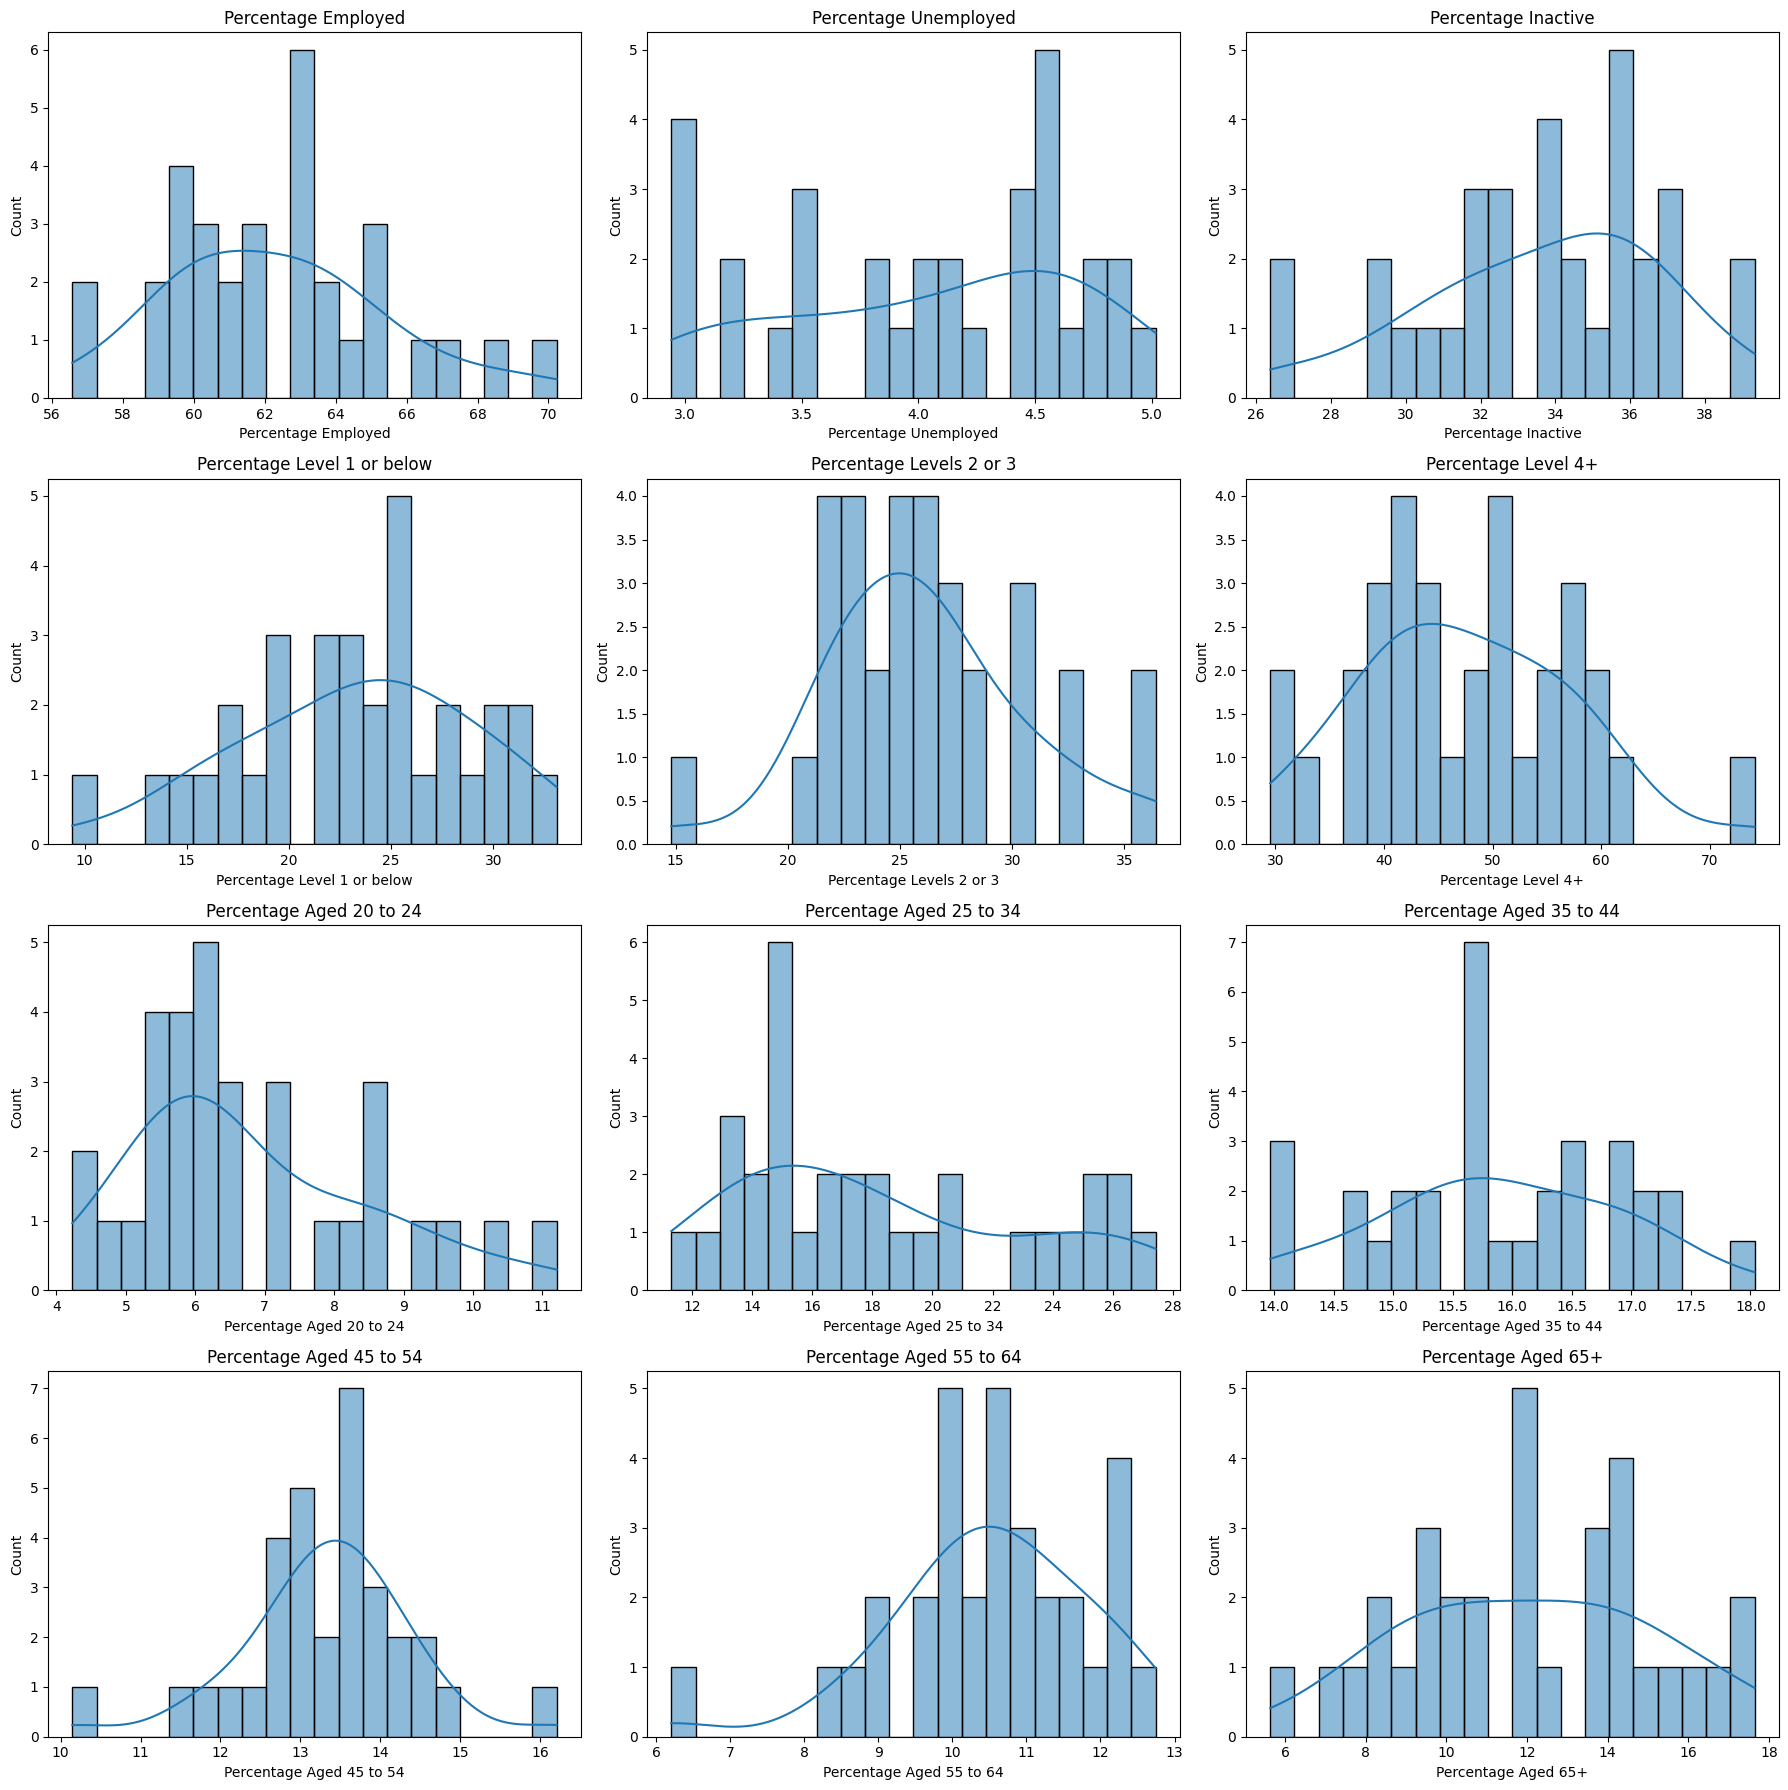

In [170]:
#Generate histograms to explore variables and check for outliers

# Create a figure and axis object with 4 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(18, 18))

# Define the independent variables
independent_variables = [
    'Percentage Employed',
    'Percentage Unemployed',
    'Percentage Inactive',
    'Percentage Level 1 or below',
    'Percentage Levels 2 or 3',
    'Percentage Level 4+',
    'Percentage Aged 20 to 24',
    'Percentage Aged 25 to 34',
    'Percentage Aged 35 to 44',
    'Percentage Aged 45 to 54',
    'Percentage Aged 55 to 64',
    'Percentage Aged 65+'
]

# Plot histograms with KDE curves for each variable
for i, variable in enumerate(independent_variables):
    row = i // 3
    col = i % 3
    sns.histplot(data=merged, x=variable, bins=20, kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'{variable}')

plt.tight_layout()
plt.show()

Outliers seem to represent natural variation in the population, therefore, they do not need to be removed (Salgado et al., 2016).

### Perform exploratory data analysis

Visualise the relationships between dependent and independent variables

Scatterplots can reveal underlying patterns such as linear or logarithmic relationships and can help in identifying the type and strength of the correlation between variables.

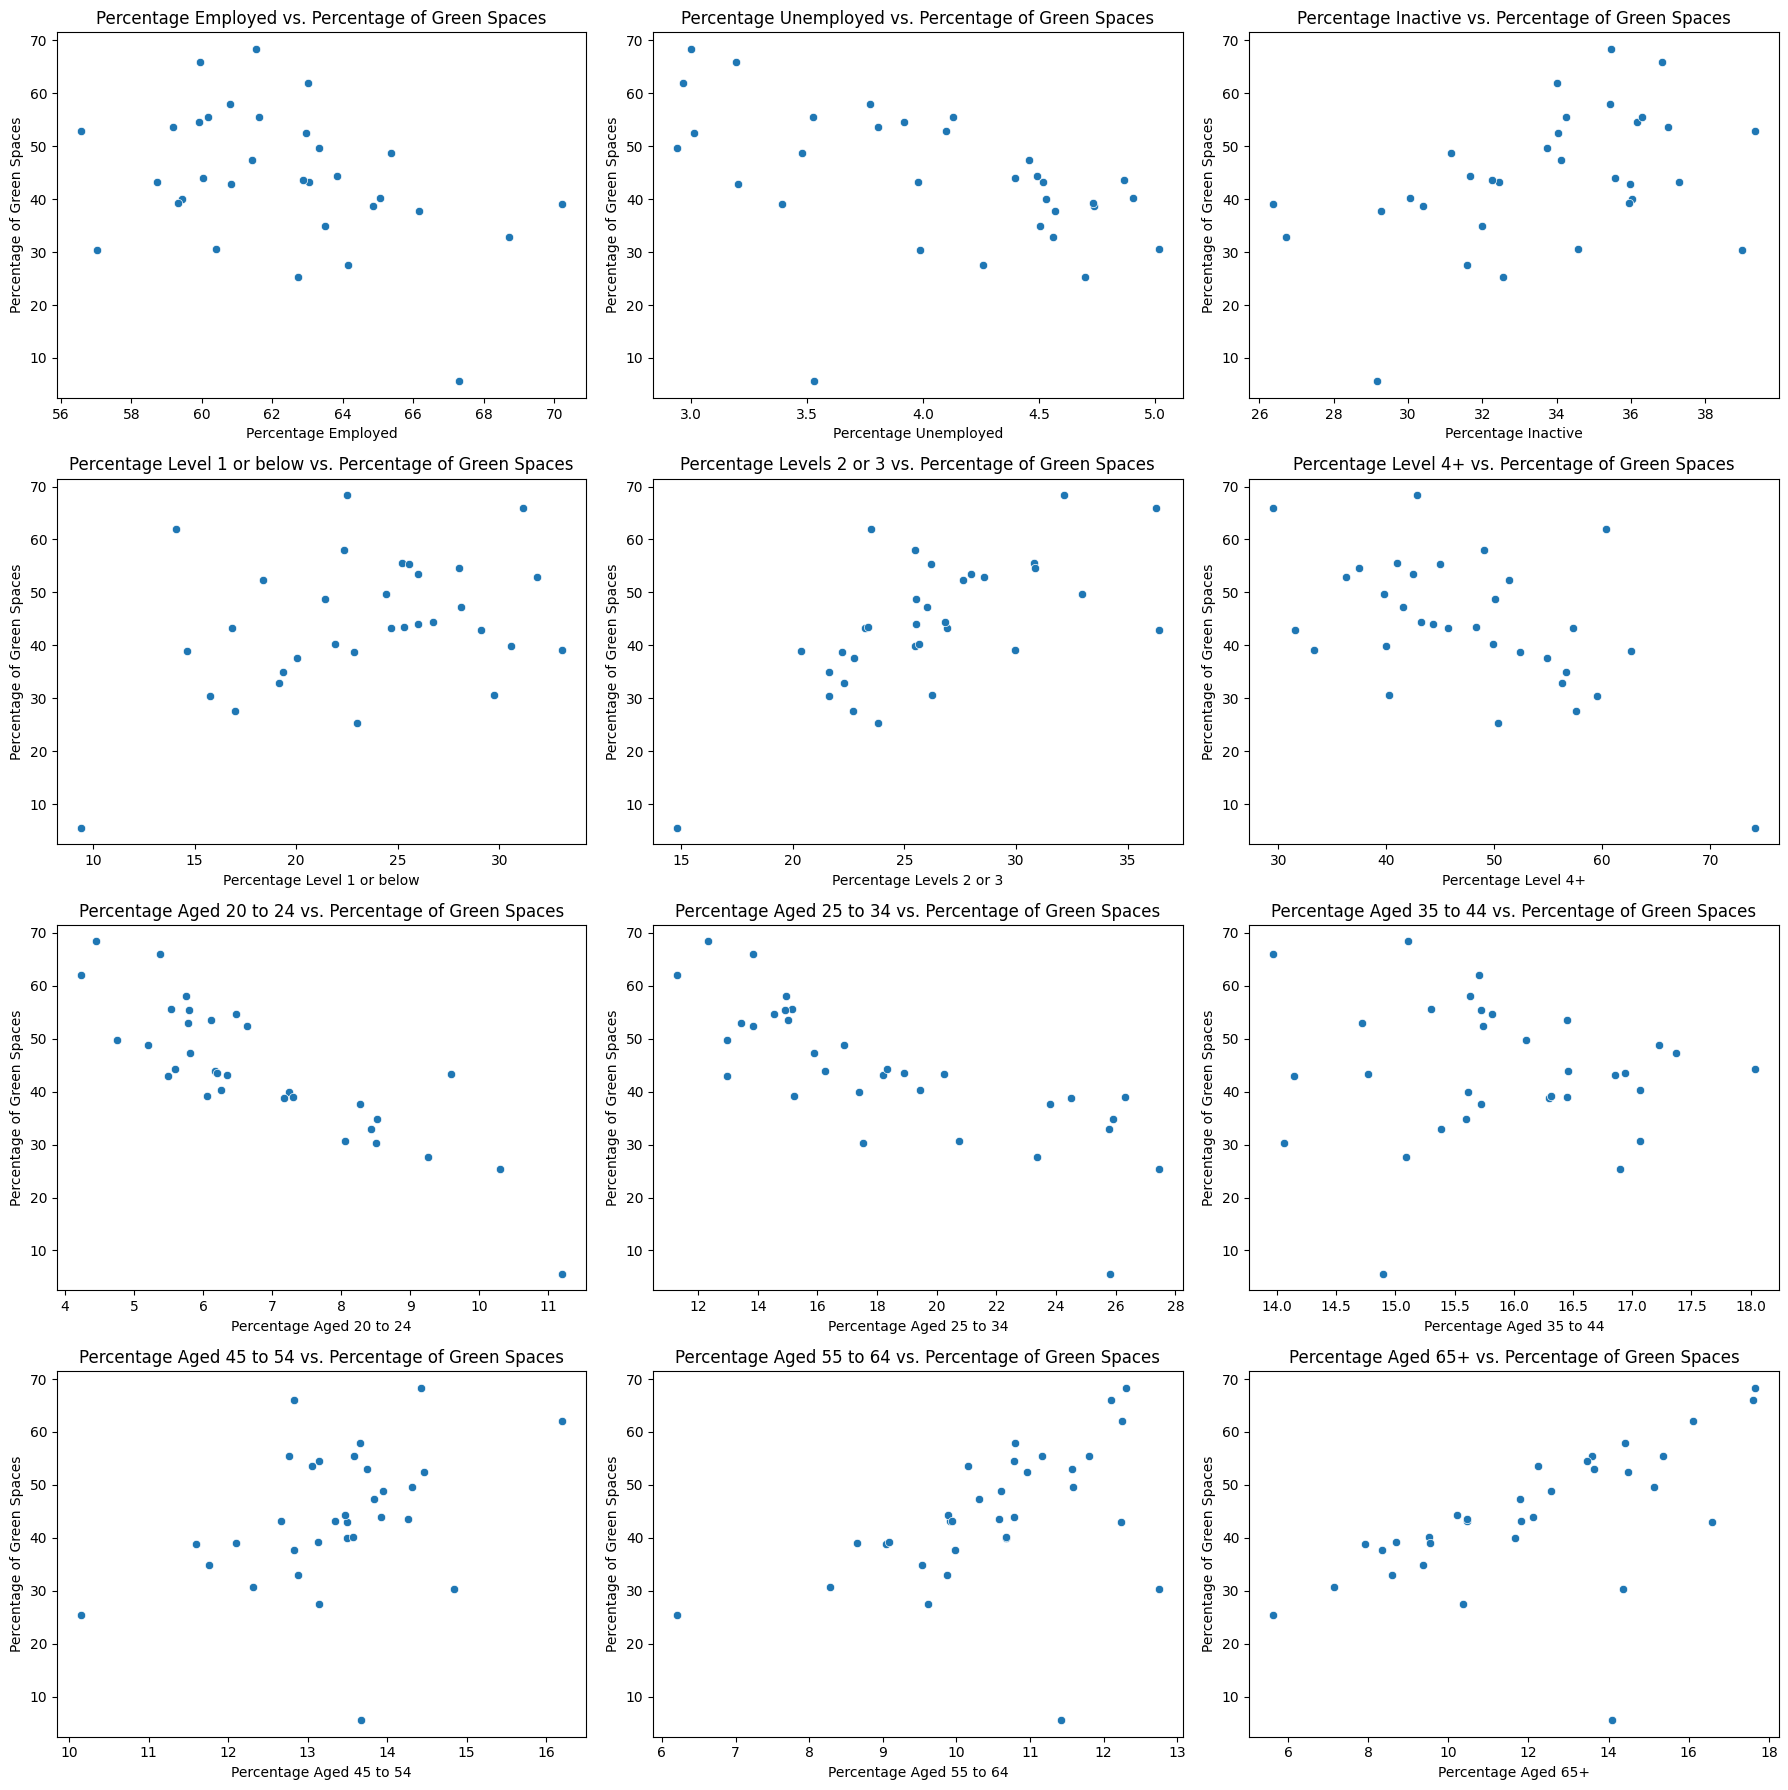

In [171]:
# Generate scatterplots for each independent variable against the dependents

# Create a figure and axis object with 4 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(18, 18))

# Define the independent variables
independent_variables = [
    'Percentage Employed',
    'Percentage Unemployed',
    'Percentage Inactive',
    'Percentage Level 1 or below',
    'Percentage Levels 2 or 3',
    'Percentage Level 4+',
    'Percentage Aged 20 to 24',
    'Percentage Aged 25 to 34',
    'Percentage Aged 35 to 44',
    'Percentage Aged 45 to 54',
    'Percentage Aged 55 to 64',
    'Percentage Aged 65+'
]

# Plot scatterplots for each variable against 'Percentage of Green Spaces'
for i, variable in enumerate(independent_variables):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=merged, x=variable, y='Percentage of Green Spaces', ax=axs[row, col])
    axs[row, col].set_title(f'{variable} vs. Percentage of Green Spaces')

plt.tight_layout()
plt.show()

No observed linear relationship between independent and dependent variables aside from percentage 65+ and Percentage 20 to 24. Additionally, data is not normal. Therefore, data does not satisfy the assumptions for OLS regression or Pearson's correlation (Schmidt and Finan, 2018; Schober et al., 2018)

Data is ordinal thus, can be analysed using Spearman's rank correlation as it also does not rely on normality of data (Schober et al., 2018)

#Spearman's rank correlation

In [172]:
# Calculate Spearman's rank correlation
greenspaces_corr = merged[['Percentage of Green Spaces',
                           'Percentage Employed',
                           'Percentage Unemployed',
                           'Percentage Inactive',
                           'Percentage Level 1 or below',
                           'Percentage Levels 2 or 3',
                           'Percentage Level 4+',
                           'Percentage Aged 20 to 24',
                           'Percentage Aged 25 to 34',
                           'Percentage Aged 35 to 44',
                           'Percentage Aged 45 to 54',
                           'Percentage Aged 55 to 64',
                           'Percentage Aged 65+']].corr(method='spearman')

# Change names for display
display_names_corr = {
    'Percentage of Green Spaces': 'Percentage of Green Spaces',
    'Percentage Employed': 'Percentage Employed',
    'Percentage Unemployed': 'Percentage Unemployed',
    'Percentage Inactive': 'Percentage Inactive',
    'Percentage Level 1 or below': 'Percentage Qualified: Level 1 or below',
    'Percentage Levels 2 or 3': 'Percentage Qualified: Levels 2 or 3',
    'Percentage Level 4+': 'Percentage Qualified: Level 4+',
    'Percentage Aged 20 to 24': 'Percentage Aged 20 to 24',
    'Percentage Aged 25 to 34': 'Percentage Aged 25 to 34',
    'Percentage Aged 35 to 44': 'Percentage Aged 35 to 44',
    'Percentage Aged 45 to 54': 'Percentage Aged 45 to 54',
    'Percentage Aged 55 to 64': 'Percentage Aged 55 to 64',
    'Percentage Aged 65+': 'Percentage Aged 65+'
}

# Rename the columns and index
greenspaces_corr.rename(columns=display_names_corr, index=display_names_corr, inplace=True)

greenspaces_corr


Percentage of Green Spaces  \
Percentage of Green Spaces                                1.000000   
Percentage Employed                                      -0.344941   
Percentage Unemployed                                    -0.577346   
Percentage Inactive                                       0.454912   
Percentage Qualified: Level 1 or below                    0.289223   
Percentage Qualified: Levels 2 or 3                       0.647727   
Percentage Qualified: Level 4+                           -0.458944   
Percentage Aged 20 to 24                                 -0.820748   
Percentage Aged 25 to 34                                 -0.831745   
Percentage Aged 35 to 44                                 -0.050220   
Percentage Aged 45 to 54                                  0.392962   
Percentage Aged 55 to 64                                  0.587610   
Percentage Aged 65+                                       0.697214   

                                        Percentage Employed  \
Percentage of Green Spaces                        -0.344941   
Percentage Employed                                1.000000   
Percentage Unemployed                              0.075880   
Percentage Inactive                               -0.973240   
Percentage Qualified: Level 1 or below            -0.562683   
Percentage Qualified: Levels 2 or 3               -0.437683   
Percentage Qualified: Level 4+                     0.549120   
Percentage Aged 20 to 24                           0.160191   
Percentage Aged 25 to 34                           0.496701   
Percentage Aged 35 to 44                           0.273094   
Percentage Aged 45 to 54                          -0.083944   
Percentage Aged 55 to 64                          -0.306452   
Percentage Aged 65+                               -0.338710   

                                        Percentage Unemployed  \
Percentage of Green Spaces                          -0.577346   
Percentage Employed                                  0.075880   
Percentage Unemployed                                1.000000   
Percentage Inactive                                 -0.259897   
Percentage Qualified: Level 1 or below               0.237537   
Percentage Qualified: Levels 2 or 3                 -0.302053   
Percentage Qualified: Level 4+                       0.009164   
Percentage Aged 20 to 24                             0.486804   
Percentage Aged 25 to 34                             0.632698   
Percentage Aged 35 to 44                             0.406158   
Percentage Aged 45 to 54                            -0.407991   
Percentage Aged 55 to 64                            -0.660557   
Percentage Aged 65+                                 -0.860704   

                                        Percentage Inactive  \
Percentage of Green Spaces                         0.454912   
Percentage Employed                               -0.973240   
Percentage Unemployed                             -0.259897   
Percentage Inactive                                1.000000   
Percentage Qualified: Level 1 or below             0.513563   
Percentage Qualified: Levels 2 or 3                0.512097   
Percentage Qualified: Level 4+                    -0.554252   
Percentage Aged 20 to 24                          -0.264296   
Percentage Aged 25 to 34                          -0.615103   
Percentage Aged 35 to 44                          -0.376466   
Percentage Aged 45 to 54                           0.129765   
Percentage Aged 55 to 64                           0.449047   
Percentage Aged 65+                                0.505865   

                                        Percentage Qualified: Level 1 or below  \
Percentage of Green Spaces                                            0.289223   
Percentage Employed                                                  -0.562683   
Percentage Unemployed                                                 0.237537   
Percentage Inactive                                   

#Data Visualisation

##Heatmap

A heat map is a graphical representation of data where individual values contained in a matrix are represented as colours. Heat maps offer a clear and intuitive way to see how different variables correlate with each other (Metsalu and Vilo, 2015).

This heatmap is designed for academic researchers and policymakers. The  matrix format allows for easy comparison between variables, making the heat map suitable for the in-depth examination required in academic research and policymaking settings.

The heatmap uses a diverging colour ramp ranging from red to blue to represent the strength and direction of correlations, with blue indicating positive correlations and red indicating negative correlations. The intensity of the colours reflects the strength of the correlations, making it easy to identify significant relationships. The gradient within the heatmap will also allow persons with colour defiencies to distinguish and interpret the map.


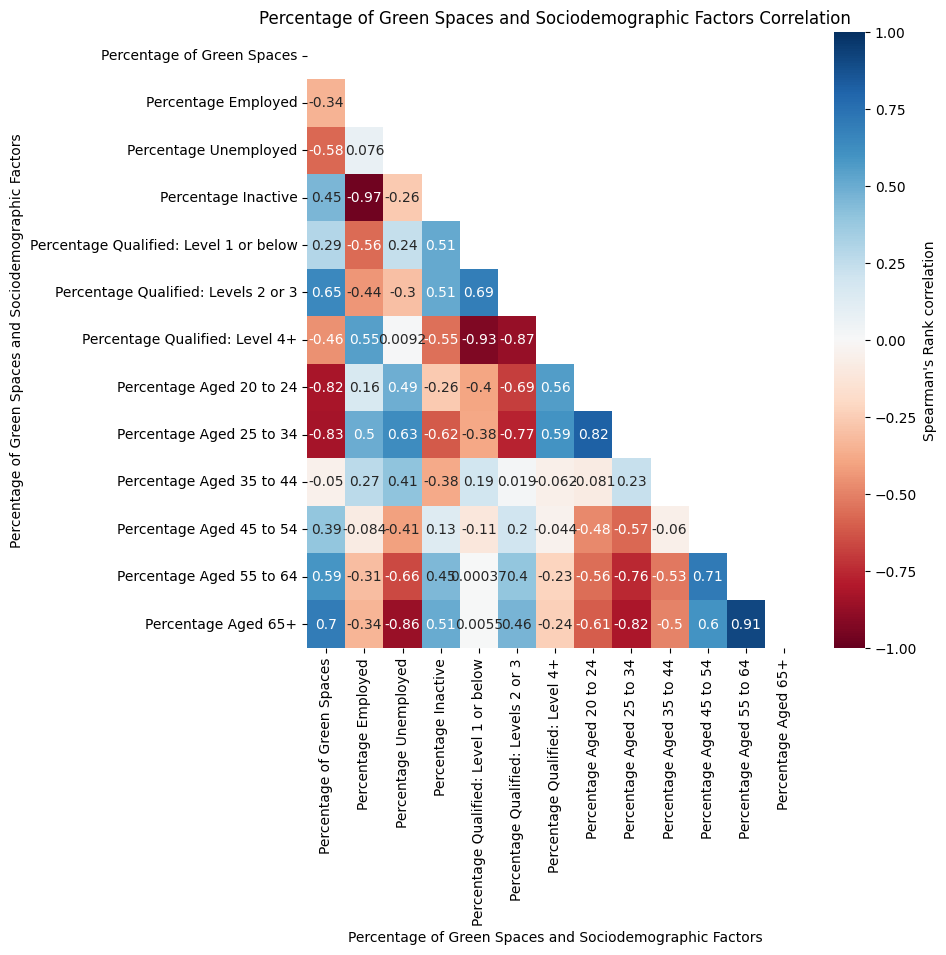

In [173]:
# Define plot size
fig,ax = plt.subplots(figsize=(8,8))

# Define mask
data_to_mask = np.triu(np.ones_like(greenspaces_corr))

# Plot a heatmap of the correlation dataframe
sns.heatmap(greenspaces_corr,
            # Display spearman's rank correlation values on the squares
            annot=True,
            # Define colourmap
            cmap='RdBu',
            # Define value of minimum colour on cbar
            vmin=-1,
            # Define value of maximum colour on cbar
            vmax=1,
            # Add the mask
            mask=data_to_mask,
            # Add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # Plot on the axis
            ax=ax)

# Set axis labels
ax.set(xlabel="Percentage of Green Spaces and Sociodemographic Factors",
       ylabel="Percentage of Green Spaces and Sociodemographic Factors",
      title ='Percentage of Green Spaces and Sociodemographic Factors Correlation' );
plt.savefig('Percentage_of_Green_Spaces_and_Sociodemographic_Factors_Correlation.png')

##Model Interpretation
Boroughs with more green space tend to have a higher percentage of persons 65+ (0.697) and 55-64 (0.588). Conversely, there is a strong negative correlation with the  20 to 24 (-0.821) and 25-34 age group (-0.832), suggesting younger adults are less prevalent in greener areas. Younger individuals, especially those in the 20 to 34 age range, are more likely to live in central London, where job opportunities, entertainment, and social activities are more abundant but green spaces are few (Burdett et al., 2014).

Additionally, there is a notable positive correlation between green space and residents with qualification levels of Level 2 or 3 (0.648) and a negative correlation with lower unemployment rates (-0.577). This could be because greener boroughs often have better living conditions which can attract more stable populations while central areas might have higher unemployment rates due to greater economic diversity.

#Spatial Data Visualisation

##Bivariate Chloropleth Map
This map was created following the methodology outlined by Hamilton (2022) outlining how to create bivariate chloropleth maps for spatial analysis in python. Generative AI (ChatGPT, 2024) was used to aid in iterating the different variables to create a combined map rather than redoing each variable separately and all instances of use are elaborated below.

A bivariate choropleth map is a thematic map that simultaneously displays two variables on a single map by using colour to represent the interaction or relationship between these variables (Moos et al., 2021).

The bivariate choropleth map is intended for academic researchers and policymakers as well as the general public as it provides detailed insights for experts while remaining accessible and informative for non-experts; allowing the public to be able to participate urban planning processes and local government initiatives.

The corner colours were chosen for their intuitive understanding while avoiding the good vs bad connotations of other color ramps.

Light grey for low values

Cyan for high values of the independent variable

Pink for high values of the dependent variable

Dark purple for high values of both variables

The smooth gradient between these colours ensures that viewers can easily detect varying degrees of the two variables. A detailed legend explains the colour combinations, making the map accessible to non-experts. The gradient within the colour palettes also allow persons with colour defiencies to distinguish and interpret the map.

The sociodemographic factors in this spatial visualisation were chosen based on their strong positive or negative correlation with green spaces.

In [174]:
# Install system dependencies to create the bivariate chloropleth map (Sharber, 2020)
#Google Colab runs on a Debian based system
!apt-get update
!apt-get install -y libcairo2-dev libjpeg-dev libgif-dev

#Generative AI was used to determine how to install system dependencies on other OS for this analysis if needed (ChatGPT,2024).
#Prompt: Modify the above code to install system dependencies for other operating systems
##MacOS
##Update Homebrew
#brew update
##Install dependencies
#brew install cairo libjpeg giflib

#Windows OS
##Update conda
#conda update conda
##Install dependencies
#conda install -c conda-forge cairo libjpeg-turbo giflib

##Linux Fedora
##Update dnf
#sudo dnf update
## Install dependencies
#sudo dnf install cairo-devel libjpeg-turbo-devel giflib-devel

##Linux CentOS
##Update yum
#sudo yum update
##Install dependencies
#sudo yum install cairo-devel libjpeg-turbo-devel giflib-devel


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 1s (178 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
libgif-dev is already the

In [175]:
# Install Python packages
!pip install generativepy
!pip install contextily

In [176]:
#Import required packages to generate bivariate chloropleth map
import matplotlib.colors as mcolors
import contextily as cx
from PIL import ImageColor
from generativepy.color import Color
from matplotlib.colors import rgb2hex
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [177]:
# Function to convert hex colour to RGB to Colour object following methodology Hamilton (2022)
def hex_to_Color(hexcode):
    rgb = ImageColor.getcolor(hexcode, 'RGB')
    rgb = [v/256 for v in rgb]
    rgb = Color(*rgb)
    return rgb

# Get corner colors
c00 = hex_to_Color('#e8e8e8')
c10 = hex_to_Color('#be64ac')
c01 = hex_to_Color('#5ac8c8')
c11 = hex_to_Color('#3b4994')

# Create square grid of colours using colour interpolation from generativepy package
percentile_bounds = [25, 50, 75, 100]
num_grps = len(percentile_bounds)
c00_to_c10 = []
c01_to_c11 = []
colorlist = []
for i in range(num_grps):
    c00_to_c10.append(c00.lerp(c10, 1/(num_grps-1) * i))
    c01_to_c11.append(c01.lerp(c11, 1/(num_grps-1) * i))
for i in range(num_grps):
    for j in range(num_grps):
        colorlist.append(c00_to_c10[i].lerp(c01_to_c11[i], 1/(num_grps-1) * j))

# Convert back to hex colour
colorlist = [rgb2hex([c.r, c.g, c.b]) for c in colorlist]

In [178]:
# Function to get bivariate colour given two percentiles following methodology by Hamilton (2022)
def get_bivariate_choropleth_color(p1, p2):
    if p1 >= 0 and p2 >= 0:
        count = 0
        stop = False
        for percentile_bound_p1 in percentile_bounds:
            for percentile_bound_p2 in percentile_bounds:
                if not stop and p1 <= percentile_bound_p1:
                    if not stop and p2 <= percentile_bound_p2:
                        color = colorlist[count]
                        stop = True
                count += 1
    else:
        color = [0.8, 0.8, 0.8, 1]
    return color

The code below was generated with the aid of Generative AI  (ChatGPT, 2024)

The initial code that creates a single bivariate chloropleth map based on Hamilton (2022) comparing percentage of green spaces and percentage unemployed was provided (and is provided as a separate text file) and the prompt was as follows:

I have the above code that creates a single bivariate choropleth map comparing 'Percentage of Green Spaces' and 'Percentage Unemployed'.
I want to modify this code to create four bivariate choropleth maps, each comparing 'Percentage of Green Spaces' with a different variable from the following
list all held in the 'merged' dataframe:

'Percentage Levels 2 or 3'

'Percentage Aged 65+'

'Percentage Aged 25 to 34'

'Percentage Unemployed'

The final output should be a 2x2 grid of subplots, each with a title reflecting the variables being compared."

The code was then modified again by myself to rename the variables displayed.

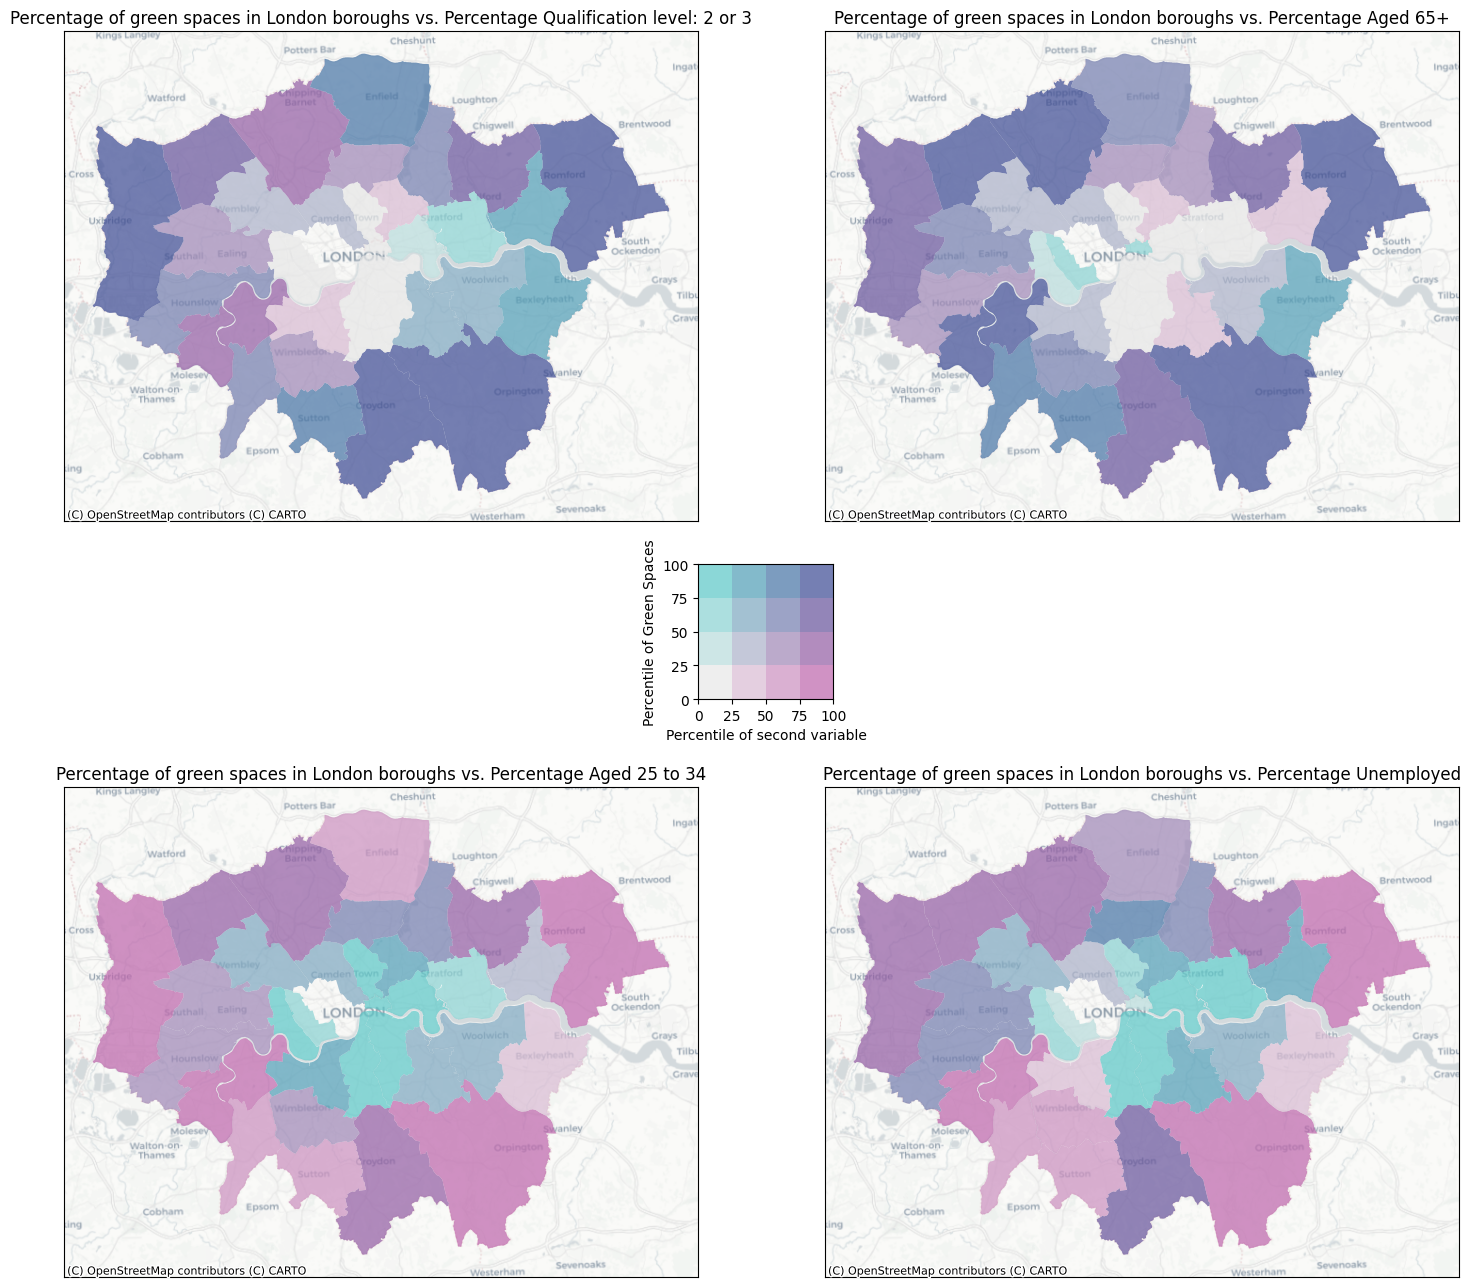

In [179]:
# List of variables to plot against 'Percentage of Green Spaces'
variables = ['Percentage Levels 2 or 3', 'Percentage Aged 65+', 'Percentage Aged 25 to 34', 'Percentage Unemployed']

# Rename the variables
display_names = {
    'Percentage Levels 2 or 3': 'Percentage Qualification level: 2 or 3',
    'Percentage Aged 65+': 'Percentage Aged 65+',
    'Percentage Aged 25 to 34': 'Percentage Aged 25 to 34',
    'Percentage Unemployed': 'Percentage Unemployed'
}

# This code creates subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# This pairs each axis with a variable
for ax, var in zip(axes.flatten(), variables):
    # This calculates the percentiles for the percentage of green spaces and the current variable
    merged['Percentage of Green Spaces_pct'] = merged['Percentage of Green Spaces'].rank(pct=True) * 100
    merged[f'{var}_pct'] = merged[var].rank(pct=True) * 100

    # This plots the map based on bivariate choropleth
    alpha = 0.7

    #Calculates the color for each borough based on the percentiles of percentage of green spaces and the current variable
    merged['color_bivariate'] = [get_bivariate_choropleth_color(p1, p2) for p1, p2 in zip(merged['Percentage of Green Spaces_pct'].values, merged[f'{var}_pct'].values)]

    #Plots the choropleth map on the current axis with the calculated colors.
    merged.plot(ax=ax, color=merged['color_bivariate'], alpha=alpha, legend=False)
    cx.add_basemap(ax=ax, crs=merged.crs, source=cx.providers.CartoDB.Positron)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Percentage of green spaces in London boroughs vs. {display_names[var]}')

# Creates a combined inset legend for all subplots
ax_legend = fig.add_axes([0.44, 0.47, 0.15, 0.075])
ax_legend.set_aspect('equal', adjustable='box')
count = 0
xticks = [0]
yticks = [0]
for i, percentile_bound_p1 in enumerate(percentile_bounds):
    for j, percentile_bound_p2 in enumerate(percentile_bounds):
        percentileboxes = [Rectangle((i, j), 1, 1)]
        pc = PatchCollection(percentileboxes, facecolor=colorlist[count], alpha=alpha)
        count += 1
        ax_legend.add_collection(pc)
        if i == 0:
            yticks.append(percentile_bound_p2)
    xticks.append(percentile_bound_p1)

ax_legend.set_xlim([0, len(percentile_bounds)])
ax_legend.set_ylim([0, len(percentile_bounds)])
ax_legend.set_xticks(list(range(len(percentile_bounds) + 1)))
ax_legend.set_xticklabels(xticks)
ax_legend.set_xlabel('Percentile of second variable')

ax_legend.set_yticks(list(range(len(percentile_bounds) + 1)))
ax_legend.set_yticklabels(yticks)
ax_legend.set_ylabel('Percentile of Green Spaces')

plt.show()


Central London areas, which tend to have more built-up environments, generally show lower percentages of green spaces compared to outer boroughs. There is a general trend where higher green space percentages correlate positively with higher education levels and negatively with unemployment rates. Conversely, higher green space areas often have more elderly residents but fewer young adults.

#References

Burdett, R., Travers, T., Moser, B., Czischke, D. and Rode , P. 2014. Density and Urban Neighbourhoods in London [Online]. Available from: https://www.lse.ac.uk/cities/Assets/Documents/Research-Reports/Density-and-Urban-Neighbourhoods-in-London-Report.pdf

ChatGPT 2024. ChatGPT . chatgpt.com. [Online]. Available from: https://chatgpt.com/.

Gebski, M. and Wong, R.K. 2007. An Efficient Histogram Method for Outlier Detection. Springer eBooks., pp.176–187.Greater London Authority 2023. London Green and Blue Cover – London Datastore. London Datastore. [Online]. Available from: https://data.london.gov.uk/dataset/green-and-blue-cover.Greater

London Authority 2011. Statistical GIS Boundary Files for London. London Datastore. [Online]. Available from: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london.

Hamilton, A. 2022. Bivariate choropleth maps. Water Programming: A Collaborative Research Blog. [Online]. [Accessed 17 May 2024]. Available from: https://waterprogramming.wordpress.com/2022/09/08/bivariate-choropleth-maps/.

Metsalu, T. and Vilo, J. 2015. ClustVis: a web tool for visualizing clustering of multivariate data using Principal Component Analysis and heatmap. Nucleic Acids Research. 43(W1), pp.W566–W570.

Moos, N., Juergens, C. and Redecker, A.P. 2021. Geo-Spatial Analysis of Population Density and Annual Income to Identify Large-Scale Socio-Demographic Disparities. ISPRS International Journal of Geo-Information. 10(7), p.432.

Office for National Statistics 2024. 2021 Ward and LSOA Estimates – London Datastore. Estimates for London Wards and LSOAs. [Online]. Available from: https://data.london.gov.uk/census/2021-ward-and-lsoa-estimates/.

Quinn, T.P., Erb, I., Richardson, M.F. and Crowley, T.M. 2018. Understanding sequencing data as compositions: an outlook and review. Bioinformatics (Oxford, England). 34(16), pp.2870–2878.

Salgado, C.M., Azevedo, C., Proença, H. and Vieira, S.M. 2016. Noise Versus Outliers. Secondary Analysis of Electronic Health Records., pp.163–183.

Schmidt, A.F. and Finan, C. 2018. Linear regression and the normality assumption. Journal of Clinical Epidemiology. 98, pp.146–151.

Schober, P., Boer, C. and Schwarte, L.A. 2018. Correlation coefficients: Appropriate Use and Interpretation. Anesthesia & Analgesia. 126(5), pp.1763–1768.

Sharber, W. 2020. Building Python Environments across Operating Systems. Medium. [Online]. [Accessed 17 May 2024]. Available from: https://medium.com/@wvsharber/building-python-environments-across-operating-systems-3e954319d5f1.